In [103]:
import pandas as pd
import numpy as np
import seaborn as sns

In [83]:
df=pd.read_csv('car data.csv')

In [84]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

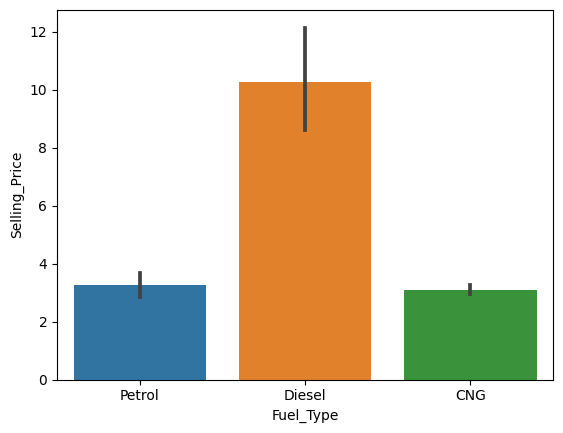

In [110]:
sns.barplot( x='Fuel_Type',y='Selling_Price', data=df)

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


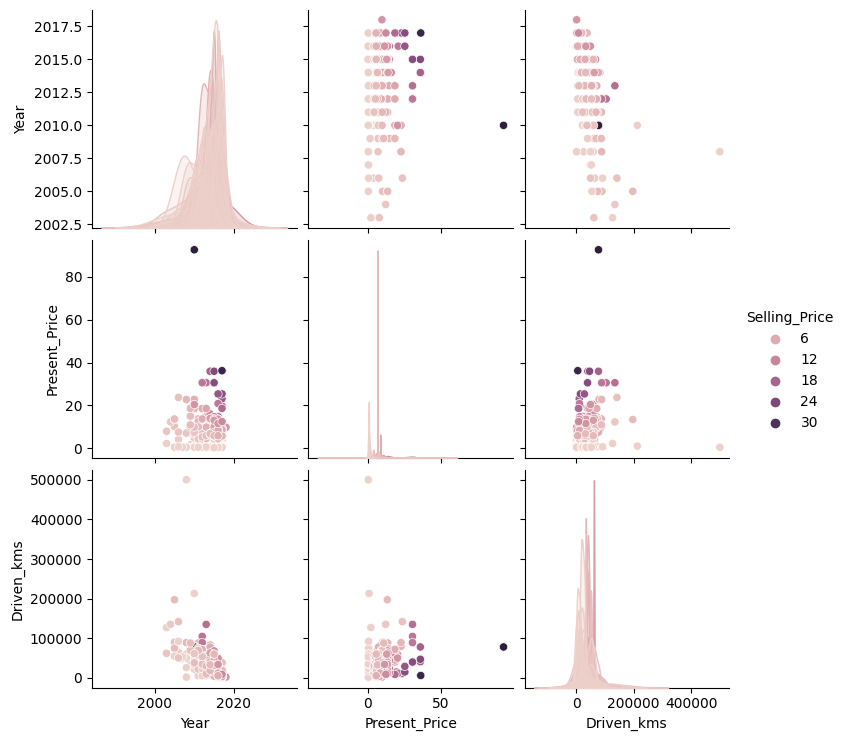

In [111]:
sns.pairplot(df,hue='Selling_Price')

In [113]:
from ydata_profiling import ProfileReport
import pandas as pd

profile = ProfileReport(df, title="Profiling Report",explorative=True)
df.profile_report(correlations={"auto": {"calculate": False}})

profile.to_file('car.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Petrol'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# df.head()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [88]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [89]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [90]:
x = df[['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission']]
y = df['Selling_Price']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd

# Concatenate training and testing data
x_combined = pd.concat([x_train, x_test], axis=0)

# Define transformer
tf1 = ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['Car_Name', 'Fuel_Type', 'Transmission'])
transformer = ColumnTransformer(transformers=[tf1], remainder='passthrough')

# Fit and transform the combined data
x_combined_transformed = transformer.fit_transform(x_combined)

# Split back into training and testing data
x_tr = x_combined_transformed[:len(x_train)]
x_te = x_combined_transformed[len(x_train):]

# Create and fit the model
model = LinearRegression()
model.fit(x_tr, y_train)


LinearRegression()

In [102]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(x_te)

# Define thresholds and bin predictions into classes
threshold = 0.5  # Example threshold
y_pred_class = (y_pred > threshold).astype(int)

# Convert y_test to binary labels based on the same threshold
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy score
accuracy = accuracy_score(y_test_class, y_pred_class)

print("Accuracy Score:", accuracy)


Accuracy Score: 0.8360655737704918
